## 22. Smoothing Using Orthogonal Functions

In this Chapter we study a different approach to nonparametric curve estimation based on **orthogonal functions**.  We begin with a brief introduction to the theory of orthogonal functions.  Then we turn to density estimation and regression.

### 22.1 Orthogonal Functions and $L_2$ Spaces

Let $v = (v_1, v_2, v_3)$ denote a three dimensional vector.  Let $\mathcal{V}$ denote the set of all such vectors.

- If $a$ is a scalar and $v$ is a vector, we define $av = (av_1, av_2, av_3)$.
- The sum of vectors $v$ and $w$ is defined as $v + w = (v_1 + w_1, v_2 + w_2, v_3 + w_3)$.
- The **inner product** between vectors $v$ and $w$ is defined by $\langle v, w \rangle = \sum_i v_i w_i$.
- The **norm** (or **length**) of a vector is defined by

$$ \Vert v \Vert = \sqrt{\langle v, v \rangle} = \sqrt{\sum_i v_i^2 }$$

- Two vectors are **orthogonal** (or **perpendicular**) if $\langle v, w \rangle = 0$.
- A set of vectors are orthogonal if each pair in the set is orthogonal.
- A vector is **normal** if $\Vert v \Vert = 1$.

Let $\phi_1 = (1, 0, 0)$, $\phi_2 = (0, 1, 0)$, $\phi_3 = (0, 0, 1)$.  These vectors are said to be an **orthonormal basis** for $\mathcal{V}$ since they have the following properties:

- they are orthogonal
- they are normal
- they form a basis for $\mathcal{V}$, that is, if $v \in \mathcal{V}$ then $v$ can be written as a linear combination of $\phi_i$, 

$$v = \sum_i \beta_i \phi_i
\quad \text{where } \beta_i = \langle \phi_i, v \rangle$$

There are other orthonormal basis for $\mathcal{V}$, for example

$$ \psi_1 = \left( \frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}} , \frac{1}{\sqrt{3}} \right),
\quad
\psi_2 = \left( \frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}} , 0 \right),
\quad
\psi_3 = \left( \frac{1}{\sqrt{6}}, \frac{1}{\sqrt{6}} , -\frac{2}{\sqrt{6}} \right)
$$

Now we make the leap from vectors to functions.  Basically, we just replace vectors with functions and sums with integrals.

Let $L_2(a, b)$ denote all functions defined on the interval $[a, b]$ such that $\int_a^b f(x)^2 dx < \infty$:

$$ L_2(a, b) = \left\{ f: [a, b] \rightarrow \mathbb{R} , \int_a^b f(x)^2 < \infty \right\} $$

We sometimes write $L_2$ instead of $L_2(a, b)$.

- The inner product between two functions $f, g \in L_2$ is $\langle f, g \rangle = \int f(x) g(x) dx$.
- The norm of $f$ is

$$ \Vert f \Vert = \sqrt{\int f(x)^2 dx} $$

- Two functions are orthogonal if $\langle f, g \rangle = 0$.
- A function is normal if $\Vert f \Vert = 1$.
- A sequence of functions $\phi_1, \phi_2, \phi_3, \dots$ is **orthonormal** if $|| \phi_i || = 1$ for each $i$ and $\langle \phi_i, \phi_j \rangle = 0$ for $i \neq j$.
- An orthonormal sequence is **complete** if the only function that is orthogonal to each $\phi_i$ is the zero function.  In that case, the functions $\phi_1, \phi_2, \phi_3, \dots$ for a basis, meaning that if $f \in L_2$ then $f$ can be written as

$$ f(x) = \sum_{j=1}^\infty \beta_j \phi_j(x)
\quad \text{where } \beta_j = \int_a^b f(x) \phi_j(x) dx $$

**Parseval's relation** says that

$$ \Vert f \Vert^2 \equiv \int f^2(x) dx = \sum_{j=1}^\infty \beta_j^2 \equiv \Vert \beta \Vert^2$$

The **cosine basis** is defined as follows:  Let $\phi_1(x) = 1$ and for $j \geq 2$ define

$$\phi_j(x) = \sqrt{2} \cos \left( (j - 1) \pi x\right)$$

The first ten functions are plotted below.

In [1]:
import numpy as np

def cosine_basis(j):
    assert j >= 1
    
    def f(x):
        if j == 1:
            return np.ones_like(x)   
        return np.sqrt(2) * np.cos((j - 1) * np.pi * x)
    
    return f

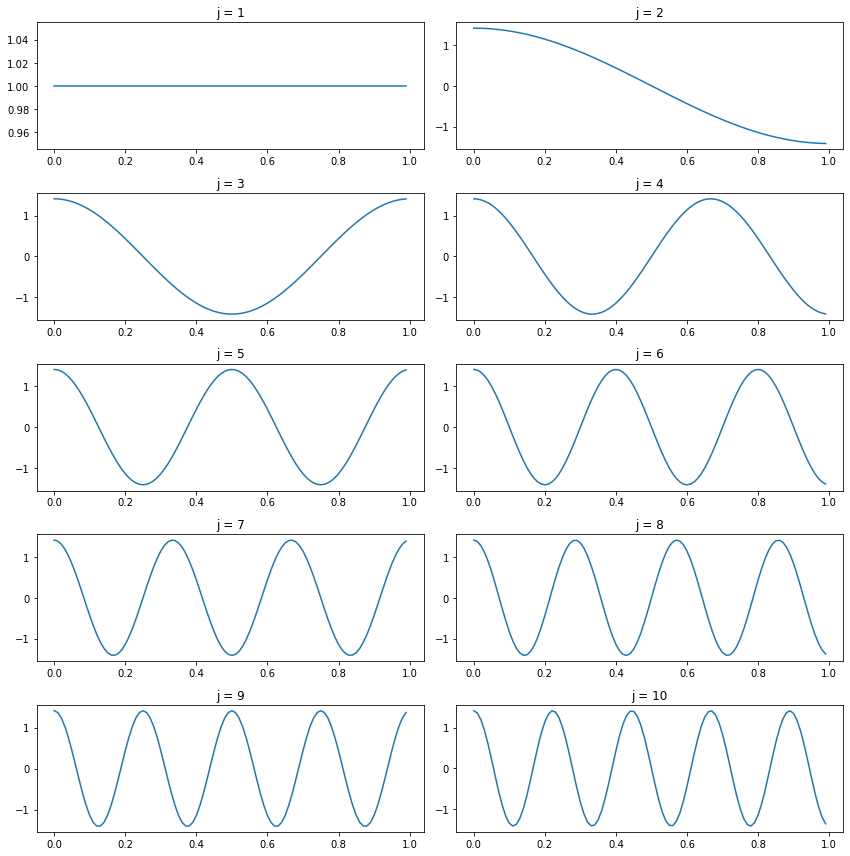

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

xx = np.arange(0, 1, step=1e-2)
plt.figure(figsize=(12, 12))
for i in range(1, 11):
    
    # Set up the plot
    ax = plt.subplot(5, 2, i)
    ax.plot(xx, cosine_basis(i)(xx))
    ax.set_title('j = %i' % i)

plt.tight_layout()
plt.show()

The **Legendre polynomials** on $[-1, 1]$ are defined by

$$ P_j(x) = \frac{1}{2^i j!} \frac{d^j}{dx^j} (x^2 - 1)^j, \quad j = 0, 1, 2, \dots $$

It can be shown that these functions are complete and orthogonal, and that

$$ \int_{-1}^1 P_j^2(x) dx = \frac{2}{2j + 1}$$

It follows that the functions

$$ \phi_j(x) = \sqrt{\frac{2j + 1}{2}}P_j(x), \quad j = 0, 1, 2, \dots $$

form an orthonormal basis for $L_2[-1, 1]$.  The first few Legendre polynomials are

$$
\begin{align}
P_0(x) &= 1 \\
P_1(x) &= x \\
P_2(x) &= \frac{1}{2}\left( 3x^2 - 1 \right) \\
P_3(x) &= \frac{1}{2}\left( 5x^3 - 3x \right)
\end{align}
$$


These polynomials may be constructed explicitly using the following recursive relation:

$$ P_{j+1}(x) = \frac{(2j + 1) x P_j(x) - j P_{j - 1}(x)}{j + 1} $$

In [3]:
import sympy
from sympy.abc import x
from functools import lru_cache

@lru_cache(maxsize=None)
def legendre_polynomial(j):
    if j == 0:
        return 1
    if j == 1:
        return x
    
    return sympy.expand(((2*j - 1) * x * legendre_polynomial(j - 1) - (j - 1) * legendre_polynomial(j - 2)) / j)

def legendre_basis(j):
    if j == 0:
        return lambda x: np.sqrt(1/2) * np.ones_like(x)
    
    pj = legendre_polynomial(j)
    return sympy.lambdify(x, sympy.sqrt((2*j + 1) / 2) * pj, "numpy")

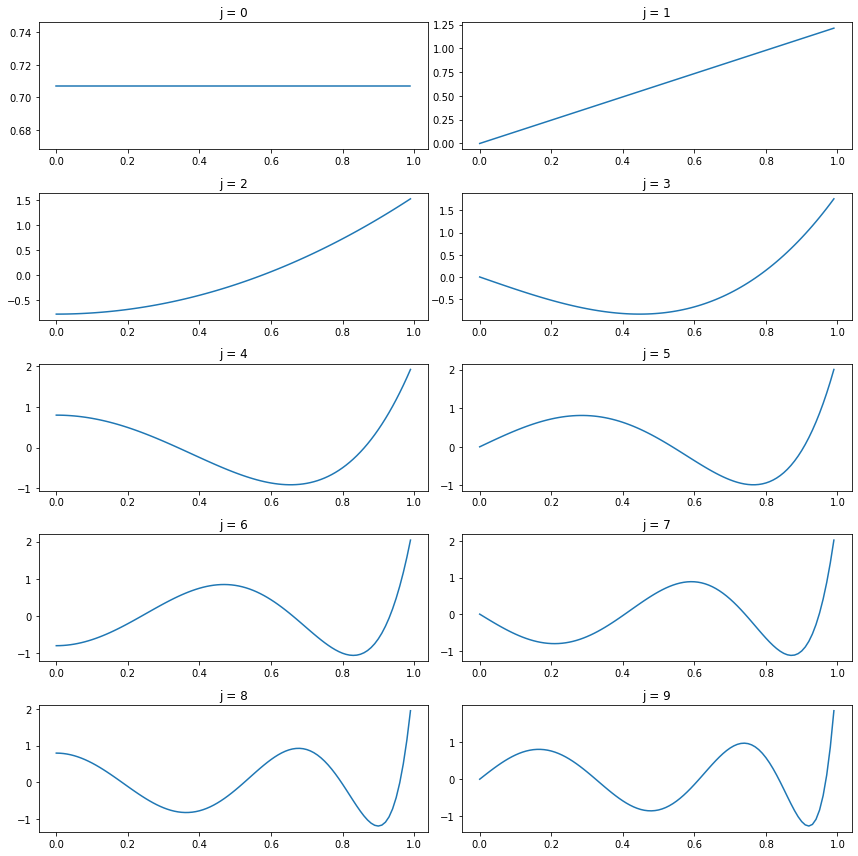

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

xx = np.arange(0, 1, step=1e-2)
plt.figure(figsize=(12, 12))
for i in range(0, 10):
    
    # Set up the plot
    ax = plt.subplot(5, 2, i + 1)
    ax.plot(xx, legendre_basis(i)(xx))
    ax.set_title('j = %i' % i)

plt.tight_layout()
plt.show()

The coefficients $\beta_1, \beta_2, \dots$ are related to the smoothness of the function $f$.  To see why note that, if $f$ is smooth, then its derivative will be finite.  Thus we expect that, for some $k$, $\int_0^1 (f^{(k)}(x))^2 dx < \infty$, where $f^{(k)}$ is the $k$-th derivative of $f$.

Now consider the cosine basis and let $f(x) = \sum_{j=1}^\infty \beta_j \phi_j(x)$.  Then,

$$ \int_0^1 (f^{(k)}(x))^2 dx = 2 \sum_{j=1}^\infty \beta_j^2 ( \pi (j - 1) ) ^{2k} $$

The only way the sum can be finite is if the $\beta_j$'s get small when $j$ gets large.  To summarize:

**If the function $f$ is smooth then the coefficients $\beta_j$ will be small when $j$ is large.**

For the rest of this chapter, we will assume we are using the cosine basis unless otherwise specified.

### 22.2 Density Estimation

Let $X_1, \dots, X_n$ be IID observations from a distribution on $[0, 1]$ with density $f$.  Assuming $f \in L_2$ we can write

$$ f(x) = \sum_{j=1}^\infty \beta_j \phi_j(x) $$

where $\phi_i$s form an orthonormal basis.  Define

$$ \hat{\beta}_j = \frac{1}{n} \sum_{i=1}^n \phi_j(X_i)$$

**Theorem 22.4**.  The mean and variance of the $\hat{\beta}_j$ are

$$
\mathbb{E}(\hat{\beta}_j) = \beta_j
\quad \text{and} \quad
\mathbb{V}(\hat{\beta}_j) = \frac{\sigma_j^2}{n}
$$

where

$$ \sigma_j^2 = \mathbb{V}(\phi_j(X_i)) = \int \left( \phi_j(x) - \beta_j\right)^2f(x) dx$$

**Proof**.  We have

$$ \mathbb{E}(\hat{\beta}_j) = \frac{1}{n} \sum_{i=1}^n \mathbb{E}(\phi_j(X_i)) = \mathbb{E}(\phi_j(X_1))  = \int \phi_j(x) f(x) dx = \beta_j$$

The calculation for variance is similar:

$$ \mathbb{V}(\hat{\beta}_j) = \frac{1}{n^2} \sum_{i=1}^n \mathbb{V}(\phi_j(X_i)) = \frac{1}{n} \mathbb{V}(\phi_j(X_1)) = \frac{1}{n} \int \left( \phi_j(x) - \beta_j\right)^2f(x) dx $$

Hence, $\hat{\beta}_j$ is an unbiased estimate of $\beta_j$.  It is tempting to estimate $f$ by $\sum_{i=1}^\infty \hat{\beta}_j \phi_j(x)$ but it turns out to have a very high variance.  Instead, consider the estimator

$$ \hat{f}(x) = \sum_{i=1}^J \hat{\beta}_j \phi_j(x) $$

The number of terms $J$ is a smoothing parameter.  Increasing $J$ will decrease bias while increasing variance.  For technical reasons, we restrict $J$ to lie in the range $1 \leq J \leq p$ where $p = p(n) = \sqrt{n}$.  To emphasize the dependence of the risk function on $J$, we write the risk function as $R(J)$.

**Theorem 22.5**.  The risk of $\hat{f}$ is given by

$$ R(J) = \sum_{j=1}^J \frac{\sigma_j^2}{J} + \sum_{j=J+1}^\infty \beta_j^2 $$

In kernel estimation, we used cross-validation to estimate the risk.  In the orthogonal function approach, we instead use the risk estimator

$$ \hat{R}(J) = \sum_{j=1}^J \frac{\hat{\sigma}_j^2}{n} + \sum_{j=J+1}^p \left( \hat{\beta}_j^2 - \frac{\hat{\sigma}_j^2}{n} \right)_{+}$$

where $a_{+} = \max \{ a, 0 \}$ and 

$$ \hat{\sigma}_j^2 = \frac{1}{n - 1} \sum_{i=1}^n \left( \phi_j(X_i) - \hat{\beta}_j\right)^2 $$

To motivate this estimator, note that $\hat{\sigma}_j^2$ is an unbiased estimator of $\sigma^2$ and $\hat{\beta}_j^2 - \hat{\sigma}_j^2 / n$ is an unbiased estimator of $\beta_j^2$.  We take the positive part of the later term since we know $\beta_j^2$ cannot be negative.  We now choose $1 \leq \hat{J} \leq p$ to minimize the risk estimator $\hat{R}(J)$.

**Summary of Orthogonal Function Density Estimation**

1.  Let

$$ \hat{\beta}_j = \frac{1}{n} \sum_{i=1}^n \phi_j(X_i) $$

2.  Choose $\hat{J}$ to minimize $\hat{R}(J)$ over $1 \leq J \leq p = \sqrt{n}$ where

$$ \hat{R}(J) = \sum_{j=1}^J \frac{\hat{\sigma}_j^2}{n} + \sum_{j=J+1}^p \left( \hat{\beta}_j^2 - \frac{\hat{\sigma}_j^2}{n} \right)_{+}$$

and

$$ \hat{\sigma}_j^2 = \frac{1}{n - 1} \sum_{i=1}^n \left( \phi_j(X_i) - \hat{\beta}_j\right)^2 $$

3.  Let

$$ \hat{f}(x) = \sum_{j=1}^\hat{J} \hat{\beta}_j \phi_j(x) $$

The estimator $\hat{f}_n$ can be negative.  If we are interested in estimating the shape of $f$, this is not a problem.  However, if we need the estimate to be a probability density function, we can truncate the estimate and then normalize it:  
$$\hat{f}^*(x) = \frac{\max \{ \hat{f}_n(x), 0 \}}{\int_0^1 \max \{ \hat{f}_n(u), 0 \} du}$$

Now, let us construct a confidence band for $f$.  Suppose we estimate $f$ using $J$ orthogonal functions.  We are essentially estimating $\overline{f}(x) = \sum_{j=1}^J \beta_j \phi_j(x)$ instead of the true density $f(x) = \sum_{j=1}^\infty \beta_j \phi_j(x)$.  Thus the confidence band should be regarded as a band for $\overline{f}(x)$.

**Theorem 22.6**.  An approximate $1 - \alpha$ confidence band for $\overline{f}$ is $(\ell(x), u(x))$ where

$$
\ell(x) = \hat{f}_n(x) - c
\quad \text{and} \quad
u(x) = \hat{f}_n(x) + x
$$

where

$$ c = \frac{JK^2}{\sqrt{n}} \sqrt{1 + \frac{\sqrt{2} z_{\alpha}}{\sqrt{J}}} $$

and

$$ K = \max_{1 \leq j \leq J} \max_x | \phi_j(x) | $$

For the cosine basis, $K = \sqrt{2}$.

### 22.3 Regression

Consider the regression model

$$ Y_i = r(x_i) + \epsilon_i, \quad i = 1, \dots, n$$

where $\epsilon_i$ are independent with mean 0 and variance $\sigma^2$.  We will initially focus on the special case where $x_i = i / n$.  We assume that $r \in L_2[0, 1]$ and hence we can write

$$
r(x) = \sum_{j=1}^\infty \beta_j \phi_j(x)
\quad \text{where } \beta_j = \int_0^1 r(x) \phi_j(x) dx
$$

where $\phi_1, \phi_2, \dots$ is an orthonormal basis for $[0, 1]$.

Define

$$ \hat{\beta}_j = \frac{1}{n} \sum_{i=1}^n Y_i \phi_j(x), 
\quad j = 1, 2, \dots$$

Since $\hat{\beta}_j$ is an average, the central limit theorem tells us that $\hat{\beta}_j$ will be approximately normally distributed.

**Theorem 22.8**.

$$ \hat{\beta}_j \approx N \left( \beta_j, \frac{\sigma^2}{n} \right) $$

**Proof**.  The mean of $\hat{\beta}_j$ is

$$ \mathbb{E}(\hat{\beta}_j) = \frac{1}{n} \sum_{i=1}^n \mathbb{E}(Y_i) \phi_j(x_i) = \frac{1}{n} \sum_{i=1}^n r(x_i) \phi_j(x_i) \approx \int r(x) \phi_j(x) dx = \beta_j$$

where the approximate equality follows from the definition of a Riemann integral: $\sum_i h(x_i) / n \rightarrow \int_0^1 h(x) dx$.

The variance is

$$ \mathbb{V}(\hat{\beta}_j) = \frac{1}{n^2} \sum_{i=1}^n \mathbb{V}(Y_i) \phi_j(x_i) = \frac{\sigma^2}{n} \left( \frac{1}{n} \sum_{i=1}^n \phi_j^2(x_i) \right) \approx \frac{\sigma^2}{n} \left( \int \phi_j^2(x) dx \right) = \frac{\sigma^2}{n}$$

since $\phi_j$ has norm 1.

As we did for density estimation, we will estimate $r$ by 

$$ \hat{r}(x) = \sum_{j=1}^J \hat{\beta}_j \phi_j(x) $$

Let

$$ R(J) = \mathbb{E} \int (r(x) - \hat{r}(x))^2 dx $$

be the risk of the estimator.

**Theorem 22.9**.  The risk $R(J)$ of the estimator $ \hat{r}(x) = \sum_{j=1}^J \hat{\beta}_j \phi_j(x) $ is

$$ R(J) = \frac{J \sigma^2}{n} + \sum_{j=J+1}^\infty \beta_j^2 $$

To motivate the estimator $\sigma^2 = \mathbb{V}(\epsilon_i)$ we use

$$ \hat{\sigma}^2 = \frac{n}{k} \sum_{i=n - k + 1}^n \hat{\beta}_j^2 $$

where $k = n / 4$.  To motivate this estimator, recall that if $f$ is smooth then $\beta_j \approx 0$ for large $j$.  So, for $j \geq k$, $\hat{\beta}_j \approx N(0, \sigma^2 / n)$.  So $\hat{\beta}_j \approx \sigma Z_j / \sqrt{n}$ for $j \geq k$, where $Z_j \sim N(0, 1)$.  Therefore,

$$ \hat{\sigma}^2 = \frac{n}{k} \sum_{i=n-k+1}^k \hat{\beta}_j^2 \approx \frac{n}{k} \sum_{i=n-k+1}^k \left( \frac{\sigma}{\sqrt{n}} Z_j \right)^2 = \frac{\sigma^2}{k} \sum_{i=n-k+1}^k Z_j^2 = \frac{\sigma^2}{k} \chi_k^2$$

since a sum of $k$ squares of independent standard normals has a $\chi_k^2$ distribution.  Now $\mathbb{E}(\chi_k^2) = k$, leading to $\mathbb{E}(\hat{\sigma}^2) \approx \sigma^2$.  Also, $\mathbb{V}(\chi_k^2) = 2k$ and so $\mathbb{V}(\hat{\sigma}^2) \approx (\sigma^4 / k^2) 2k = 2\sigma^4 / k \rightarrow 0$ as $n \rightarrow \infty$.  Thus we expect $\hat{\sigma}^2$ to be a consistent estimator of $\sigma^2$.